# <a id='toc1_'></a>[Crafting a story from a data set](#toc0_)

In this notebook I'll be doing a basic exploration of data from the Global Terrorism Database. 
The focus will be in recorded terrorism indicents in the United States. 
The goal is to gain a high level understanding of the data and to make a short presenation based on the findings. 

It should be noted that a certain number of cases in the data set are marked as ambiguous. 
This means that they have been included in the data, but there may be some doubt as to whether the incident
is really terrorism. 

This analysis keeps the ambiguous cases in the data set when looking at the overall numbers.
This decision is based on the fact that the publishers of the data included the incident.

The number of ambiguous cases is dealt with in further detail below.

# **Table of contents**<a id='toc0_'></a>    
- [Crafting a story from a data set](#toc1_)    
- [Import modules and data](#toc2_)    
- [Basic Analysis](#toc3_)    
    - [What years does the data cover?](#toc3_1_1_)    
    - [How many incidents are recorded in the data set?](#toc3_1_2_)    
    - [How many total attacks are ambiguous?](#toc3_1_3_)    
    - [How many attacks per year globally?](#toc3_1_4_)    
    - [How many attacks per year U.S. ?](#toc3_1_5_)    
    - [Ambiguous US cases by year?](#toc3_1_6_)    
    - [Attacks per decade globally?](#toc3_1_7_)    
    - [Attacks per decade US?](#toc3_1_8_)    
    - [Which countries have the most attacks globally?](#toc3_1_9_)    
    - [What type of attacks are most common globally?](#toc3_1_10_)    
    - [How many attacks are successful?](#toc3_1_11_)    
    - [Target types globally?](#toc3_1_12_)    
    - [How many casualties per attack on average globally?](#toc3_1_13_)    
    - [Who is carrying out the attacks globally?](#toc3_1_14_)    
- [U.S. Analysis](#toc4_)    
    - [Where are the attacks occurring?](#toc4_1_1_)    
    - [Which states/ cities have the most attacks?](#toc4_1_2_)    
    - [Types of attacks?](#toc4_1_3_)    
    - [Types of targets?](#toc4_1_4_)    
    - [Average killed and wounded?](#toc4_1_5_)    
    - [Top 10 US attacks - fatalities](#toc4_1_6_)    
    - [What group has caused the most deaths?](#toc4_1_7_)    
    - [Average casualties per attack?](#toc4_1_8_)    
    - [Examples of the average attack](#toc4_1_9_)    
    - [Who is carrying out attacks in the US?](#toc4_1_10_)    
    - [How long are groups in the US active](#toc4_1_11_)    
      - [Active groups by decade](#toc4_1_11_1_)    
    - [How long are groups active?](#toc4_1_12_)    
    - [Average number of attacks per group](#toc4_1_13_)    
- [1970s vs 2010s Analysis](#toc5_)    
    - [Total Number of Attacks 70’s vs. 2010](#toc5_1_1_)    
    - [Number of Groups Active 70’s vs. 2010](#toc5_1_2_)    
    - [Weapons used 70’s vs. 2010s](#toc5_1_3_)    
    - [Difference in targets 70’s vs. 2010s](#toc5_1_4_)    
    - [Fatalities comparison 70’s vs. 2010s](#toc5_1_5_)    
    - [Attacks per group 70’s vs. 2010s](#toc5_1_6_)    
    - [Differences between active groups 70’s vs. 2010s](#toc5_1_7_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Import modules and data](#toc0_)

In [1]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [97]:
global_df = pd.read_excel('raw_data/globalterrorismdb_0522dist.xlsx')
global_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [98]:
# subset the global data for the US only
usa_df = global_df[global_df['country']== 217]
usa_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
10,197001050001,1970,1,1,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


# <a id='toc3_'></a>[Basic Analysis](#toc0_)

### <a id='toc3_1_1_'></a>[What years does the data cover?](#toc0_)

In [100]:
global_years = global_df['iyear'].unique()
usa_years = usa_df['iyear'].unique()

print(f'The global data set has data from {len(global_years)} years, starting in {global_years[0]} and ending in {global_years[-1]}.')
print(f'The US data set has data from {len(usa_years)} years, starting in {usa_years[0]} and ending in {usa_years[-1]}.')

The global data set has data from 50 years, starting in 1970 and ending in 2020.
The US data set has data from 50 years, starting in 1970 and ending in 2020.


### <a id='toc3_1_2_'></a>[How many incidents are recorded in the data set?](#toc0_)

In [101]:
global_num_attacks = len(global_df)
usa_num_attacks = len(usa_df)

usa_percent = round((usa_num_attacks/global_num_attacks) * 100,1)

print(f'There are {global_num_attacks} total attacks recorded in the 50 years of the data. Of these, {usa_num_attacks} are from the USA.')
print(f'Attacks in the US accounted for {usa_percent}% of the total attacks globally during this period.')

There are 209706 total attacks recorded in the 50 years of the data. Of these, 3121 are from the USA.
Attacks in the US accounted for 1.5% of the total attacks globally during this period.


### <a id='toc3_1_3_'></a>[How many total attacks are ambiguous?](#toc0_)

In [102]:
global_df['doubtterr'].value_counts()

doubtterr
 0    160686
 1     35235
-9     13785
Name: count, dtype: int64

In [103]:
global_doubt_df = global_df[global_df['doubtterr']!=0]
usa_doubt_df = global_doubt_df[global_doubt_df['country']== 217]

In [105]:
print(f'There are {len(global_doubt_df)} cases where the motive of terrorism is in some doubt or the data was not collected.')
print(f'This is {round(len(global_doubt_df)/len(global_df),2)*100}% of the cases in the full data set.')
print('\n')
print(f'Of these {len(usa_doubt_df)} of the cases occurred in the USA')
print(f'For {round(len(usa_doubt_df)/len(usa_df),2)*100}% of the cases in the USA the motive of terrorism is in some doubt or the data was not collected.')

There are 49020 cases where the motive of terrorisim is in some doubt or the data was not collected.
This is 23.0% of the cases in the full data set.


Of these 573 of the cases occurred in the USA
For 18.0% of the cases in the USA the motive of terroisim is in some doubt or the data was not collected.


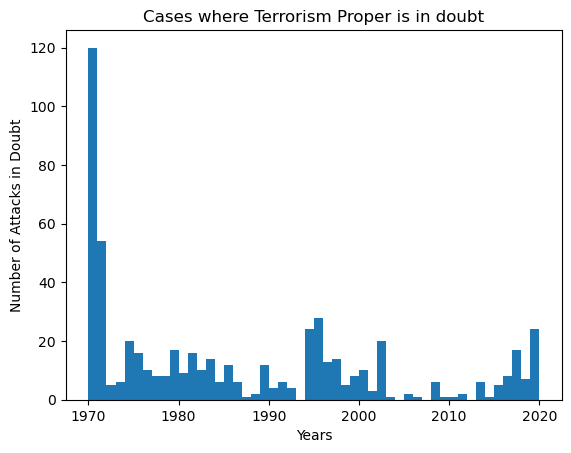

In [108]:
plt.hist(usa_doubt_df['iyear'], bins= 50)
plt.title('Cases where Terrorism Proper is in doubt')

plt.xlabel('Years')
plt.ylabel('Number of Attacks in Doubt')

plt.show()

### <a id='toc3_1_4_'></a>[How many attacks per year globally?](#toc0_)

In [110]:
global_year_counts = pd.DataFrame(global_df['iyear'].value_counts())
global_year_counts = global_year_counts.reset_index()
global_year_counts.sort_values(by='iyear', ascending=True, inplace= True)
#global_year_counts.head(55)

In [111]:
global_doubt_counts=pd.DataFrame(global_doubt_df['iyear'].value_counts())
global_doubt_counts = global_doubt_counts.reset_index()
global_doubt_counts.sort_values(by='iyear', ascending=True, inplace= True)
#global_year_counts.head(55)

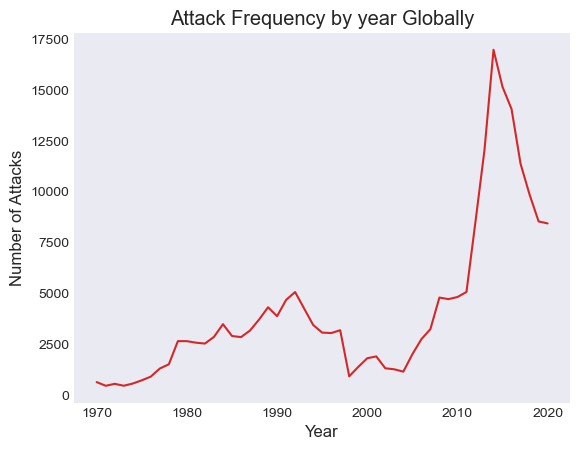

In [438]:
plt.plot(global_year_counts['iyear'] ,global_year_counts['count'], color = 'tab:red')#, label = 'Confirmed Terrorism')
#plt.plot(global_doubt_counts['iyear'] ,global_doubt_counts['count'], color = 'tab:blue', label = 'Ambiguous cases')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.title('Attack Frequency by year Globally')
#plt.legend()

plt.show()

There is an obvious spike in the mid 2010's globally. A closer look at the data shows that 
this is mostly coming from the wars in the middle east (Iraq, Afganistan) during this time. 

In [282]:
#calculate the number of deaths per year globally from all attacks

years = range(1970,2021)
global_deaths_by_year = []
us_deaths_by_year = []



for year in range(1970,2021):
    
    global_data = global_df[global_df['iyear']== year]
    us_data = usa_df[usa_df['iyear']== year]

    global_deaths_by_year.append(global_data['nkill'].sum())
    us_deaths_by_year.append(us_data['nkill'].sum())

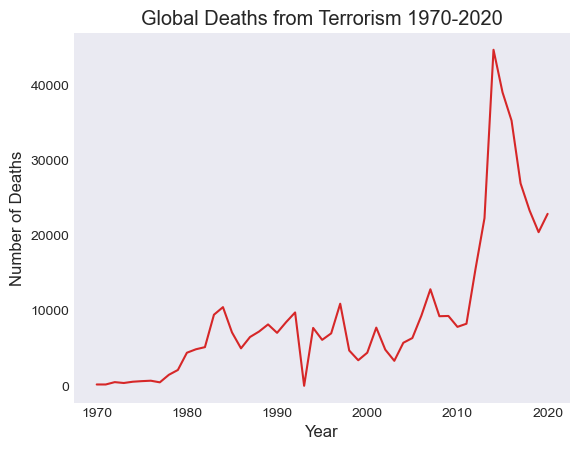

In [283]:
plt.plot(years ,global_deaths_by_year, color = 'tab:red')


plt.xlabel('Year')
plt.ylabel('Number of Deaths')

plt.title('Global Deaths from Terrorism 1970-2020')
#plt.legend()
plt.show()


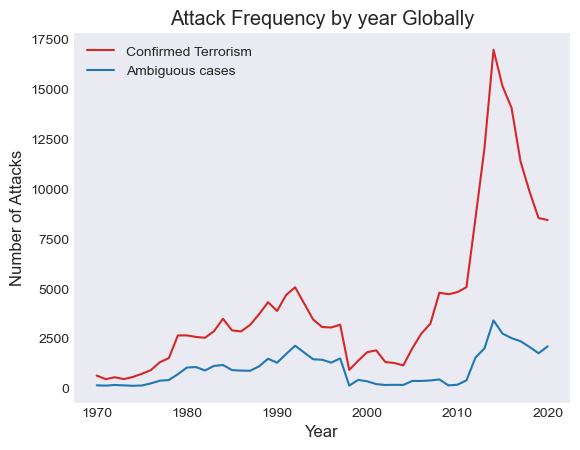

In [287]:
plt.plot(global_year_counts['iyear'] ,global_year_counts['count'], color = 'tab:red', label = 'Confirmed Terrorism')
plt.plot(global_doubt_counts['iyear'] ,global_doubt_counts['count'], color = 'tab:blue', label = 'Ambiguous cases')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.title('Attack Frequency by year Globally')
plt.legend()

plt.show()

### <a id='toc3_1_5_'></a>[How many attacks per year U.S. ?](#toc0_)

The data for 1993 was lost and could only be partially reconstructed by the publishers of the data set. 
Below we're looking at data for the US and the number of incidents for 1993 based on the reconstructed data is being added manually.

In [132]:
#Fill in the 1993 Data - Estimated 28 attacks in 1993
usa_num_years = pd.DataFrame(usa_df['iyear'])
missing_93_data = pd.DataFrame([{'iyear':1993}] * 28)

In [133]:
usa_num_years_incl_1993 = pd.concat([usa_num_years,missing_93_data], ignore_index=True)
#usa_num_years_incl_1993.head()

In [135]:
usa_year_counts = pd.DataFrame(usa_num_years_incl_1993['iyear'].value_counts())
usa_year_counts = usa_year_counts.reset_index()
usa_year_counts.sort_values(by='iyear', ascending=True, inplace= True)
#usa_year_counts.head(55)

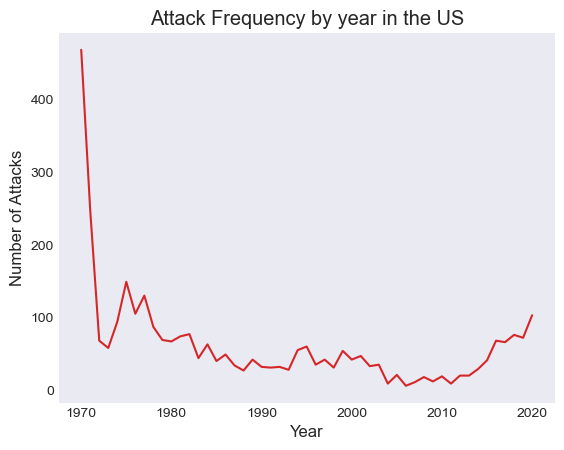

In [481]:
plt.plot(usa_year_counts['iyear'] ,usa_year_counts['count'], color = 'tab:red')
plt.title('Attack Frequency by year in the US')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.show()

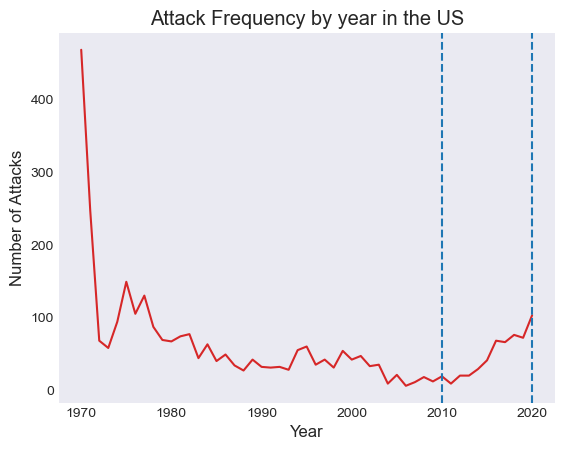

In [485]:
plt.plot(usa_year_counts['iyear'] ,usa_year_counts['count'], color = 'tab:red')
plt.title('Attack Frequency by year in the US')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.axvline(2010, color = 'tab:blue', linestyle = '--')
plt.axvline(2020, color = 'tab:blue', linestyle = '--')


plt.show()

Attacks in 2020 are 5.4 times what they were in 2010.
The most comparable year is 1976. Attack frequency is about 100 a year, or 2 per week.

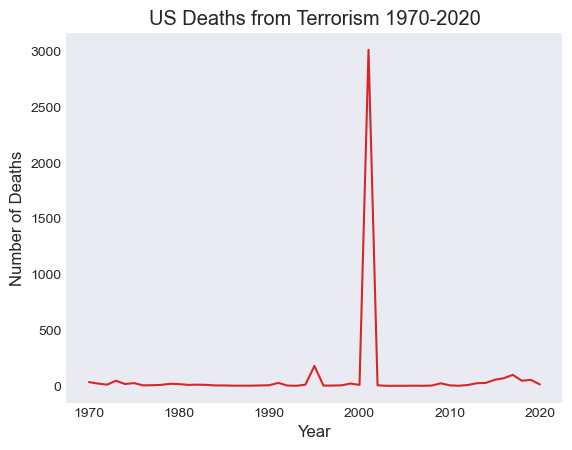

In [289]:
plt.plot(years ,us_deaths_by_year, color = 'tab:red')


plt.xlabel('Year')
plt.ylabel('Number of Deaths')

plt.title('US Deaths from Terrorism 1970-2020')
#plt.legend()
plt.show()

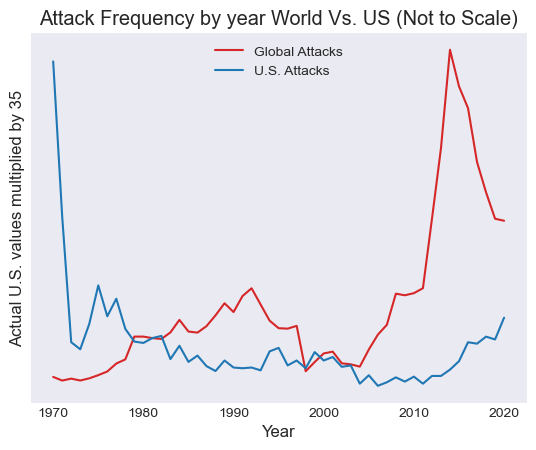

In [178]:
#Scale the US data so that we can compare the shapes of the distributions on a single graph.
scaled_us_data = usa_year_counts['count']*35

plt.plot(global_year_counts['iyear'] ,global_year_counts['count'], color = 'tab:red', label = 'Global Attacks')
plt.plot(usa_year_counts['iyear'] ,scaled_us_data, color = 'tab:blue', label = 'U.S. Attacks')
#plt.plot(global_doubt_counts['iyear'] ,global_doubt_counts['count'], color = 'tab:blue', label = 'Ambiguous cases')

plt.xlabel('Year')
plt.ylabel('Actual U.S. values multiplied by 35')
plt.yticks([])

plt.title('Attack Frequency by year World Vs. US (Not to Scale)')
plt.legend()

plt.show()

### <a id='toc3_1_6_'></a>[Ambiguous US cases by year?](#toc0_)

In [151]:
usa_doubt_counts=pd.DataFrame(usa_doubt_df['iyear'].value_counts())
usa_doubt_counts = usa_doubt_counts.reset_index()
usa_doubt_counts.sort_values(by='iyear', ascending=True, inplace= True)
usa_doubt_counts.head(55)

,iyear,count
0,1970,120
1,1971,54
34,1972,5
27,1973,6
4,1974,20
8,1975,16
17,1976,10
24,1977,8
23,1978,8
7,1979,17


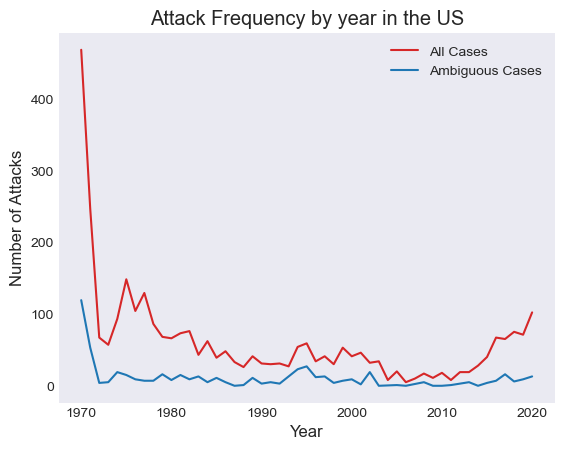

In [482]:
plt.plot(usa_year_counts['iyear'] ,usa_year_counts['count'], color = 'tab:red', label = 'All Cases')
plt.plot(usa_doubt_counts['iyear'] ,usa_doubt_counts['count'], color = 'tab:blue', label = 'Ambiguous Cases')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.legend()
plt.title('Attack Frequency by year in the US')

plt.show()

In [156]:
ambig = len(usa_df[usa_df['doubtterr']!=0])
not_ambig = len(usa_df[usa_df['doubtterr'] == 0])

total = ambig + not_ambig
percent_ambig =round(( ambig/total)*100,1)

print(f'Across the 50 years of the data set, about {percent_ambig}% of attacks are listed as ambiguous in some way.')

Across the 50 years of the data set, about 18.4% of attacks are listed as ambiguous in some way.


In [532]:
usa_doubt_df.iloc[0].summary


'1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States. Three transformers were damaged costing an estimated $20,000 to $25,000. There were no casualties.'

### <a id='toc3_1_7_'></a>[Attacks per decade globally?](#toc0_)

In [157]:
decade_dict_global = {'1970-1980':0, '1980-1990':0,'1990-2000':0,'2000-2010':0,'2010-2020':0}


for index in global_year_counts.index:
    data = global_year_counts.iloc[index]
    year = data['iyear']
    count = data['count']

    if year >= 1970 and year <1980:
        decade_dict_global['1970-1980'] += count
    
    elif year >= 1980 and year <1990:
        decade_dict_global['1980-1990'] += count
    
    elif year >= 1990 and year <2000:
        decade_dict_global['1990-2000'] += count
    
    elif year >= 2000 and year <2010:
        decade_dict_global['2000-2010'] += count
    
    elif year >= 2010 and year <2020:
        decade_dict_global['2010-2020'] += count





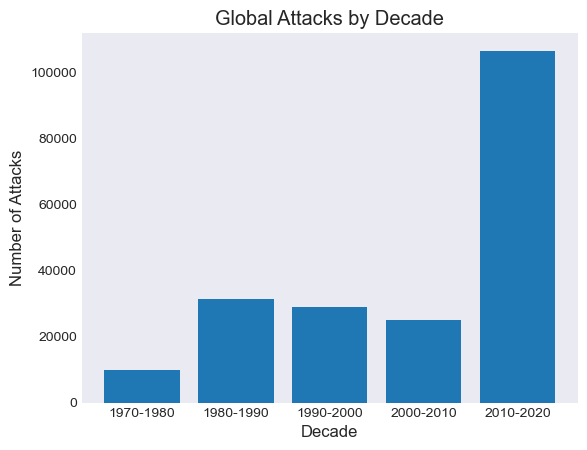

In [160]:
plt.bar(list(decade_dict_global.keys()),list(decade_dict_global.values()), color = 'tab:blue')

plt.xlabel('Decade')
plt.ylabel('Number of Attacks')

plt.title('Global Attacks by Decade')
plt.show()

### <a id='toc3_1_8_'></a>[Attacks per decade US?](#toc0_)

In [161]:
decade_dict_usa = {'1970-1980':0, '1980-1990':0,'1990-2000':0,'2000-2010':0,'2010-2020':0}


for index in usa_year_counts.index:
    data = usa_year_counts.iloc[index]
    year = data['iyear']
    count = data['count']

    if year >= 1970 and year <1980:
        decade_dict_usa['1970-1980'] += count
    
    elif year >= 1980 and year <1990:
        decade_dict_usa['1980-1990'] += count
    
    elif year >= 1990 and year <2000:
        decade_dict_usa['1990-2000'] += count
    
    elif year >= 2000 and year <2010:
        decade_dict_usa['2000-2010'] += count
    
    elif year >= 2010 and year <2020:
        decade_dict_usa['2010-2020'] += count

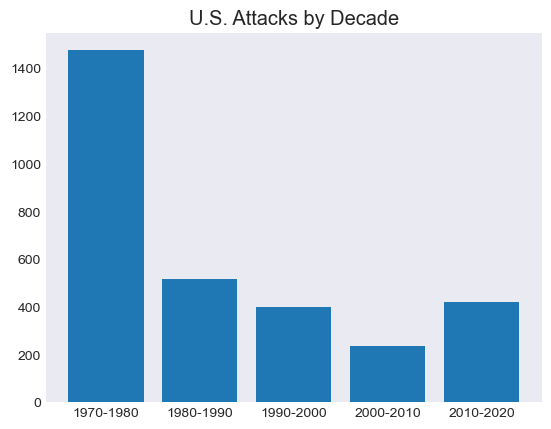

In [163]:
plt.bar(list(decade_dict_usa.keys()),list(decade_dict_usa.values()),color = 'tab:blue')

plt.title('U.S. Attacks by Decade')
plt.show()

### <a id='toc3_1_9_'></a>[Which countries have the most attacks globally?](#toc0_)


In [179]:
global_country_counts=pd.DataFrame(global_df['country_txt'].value_counts())
global_country_counts = global_country_counts.reset_index()
global_country_counts.sort_values(by='count', ascending=False, inplace= True)

global_country_counts.head(20)

,country_txt,count
0,Iraq,27521
1,Afghanistan,18920
2,Pakistan,15504
3,India,13929
4,Colombia,8915
5,Philippines,8271
6,Peru,6111
7,Yemen,6027
8,Nigeria,5550
9,United Kingdom,5513


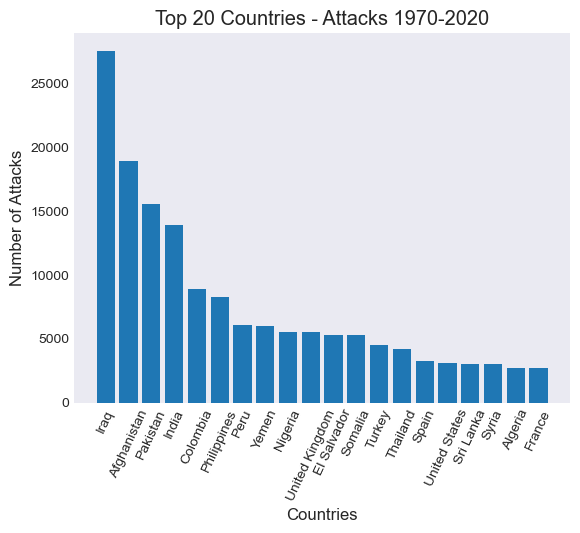

In [435]:
plt.bar(global_country_counts['country_txt'].head(20),global_country_counts['count'].head(20), color = 'tab:blue')

plt.xticks(rotation = 65)

plt.xlabel('Countries')
plt.ylabel('Number of Attacks')

plt.title('Top 20 Countries - Attacks 1970-2020')

plt.show()

In [194]:
# Create a list of colors for each bar
colors = ['tab:blue'] * 20 # Default color for all bars
highlight_index = 15  # Index of the bar you want to highlight
colors[highlight_index] = 'tab:red'  # Change the color of the specific bar


# Create a list of Alphas for each bar
alphas = [0.5] * 20 # Default color for all bars
highlight_index = 15  # Index of the bar you want to highlight
alphas[highlight_index] = 1  # Change the color of the specific bar

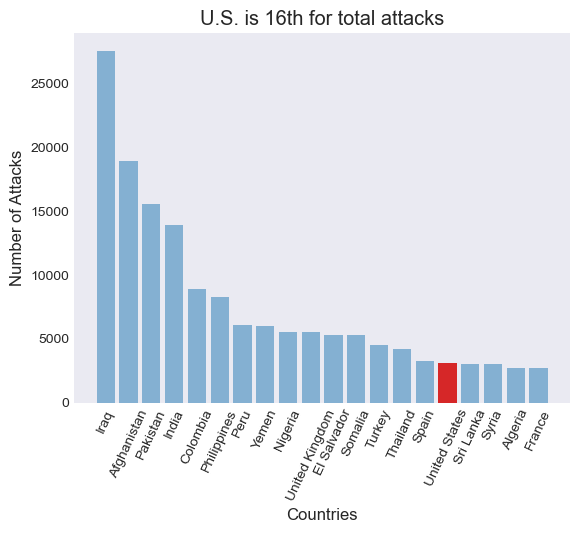

In [436]:
bars = plt.bar(global_country_counts['country_txt'].head(20),global_country_counts['count'].head(20), color = colors)

for bar, alpha in zip(bars, alphas):
    bar.set_alpha(alpha)

plt.xticks(rotation = 65)

plt.xlabel('Countries')
plt.ylabel('Number of Attacks')

plt.title('U.S. is 16th for total attacks')

plt.show()

### <a id='toc3_1_10_'></a>[What type of attacks are most common globally?](#toc0_)


There are three attack type features in the data. The analysis below uses only the first feature since this is 
the priamry one and is the most complete. The secondary and tertiary features are missing or
not applicable for most of the incidents.

In [196]:
global_df['attacktype1_txt'].value_counts()

global_attack_type_counts=pd.DataFrame(global_df['attacktype1_txt'].value_counts())
global_attack_type_counts = global_attack_type_counts.reset_index()
global_attack_type_counts.sort_values(by='count', ascending=False, inplace= True)

global_attack_type_counts.head(20)

,attacktype1_txt,count
0,Bombing/Explosion,98158
1,Armed Assault,49553
2,Assassination,21539
3,Hostage Taking (Kidnapping),14045
4,Facility/Infrastructure Attack,12325
5,Unknown,10942
6,Unarmed Assault,1229
7,Hostage Taking (Barricade Incident),1156
8,Hijacking,759


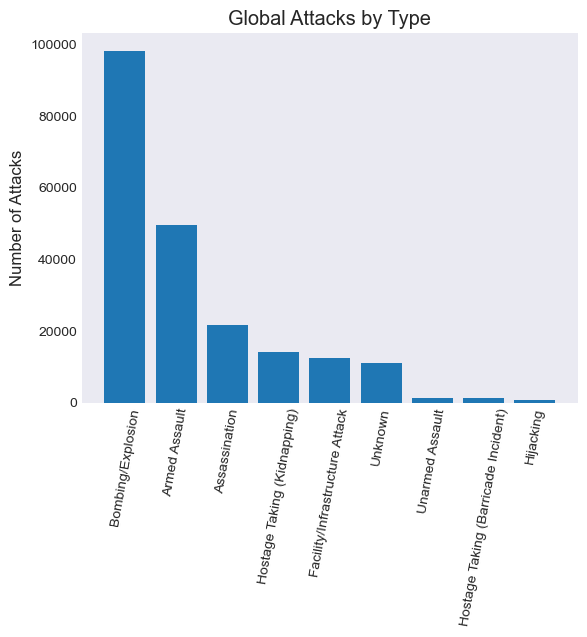

In [200]:
plt.bar(global_attack_type_counts['attacktype1_txt'].head(20),global_attack_type_counts['count'].head(20), color = 'tab:blue')

plt.xticks(rotation = 80)

plt.ylabel('Number of Attacks')

plt.title('Global Attacks by Type')

plt.show()

### <a id='toc3_1_11_'></a>[How many attacks are successful?](#toc0_)
 

In [201]:

global_success = len(global_df[global_df['success']==1])
global_failure = len(global_df[global_df['success']!= 1])
global_success_rate = round((global_success / (global_success + global_failure)*100),1)

usa_success = len(usa_df[usa_df['success']==1])
usa_failure = len(usa_df[usa_df['success']!= 1])
usa_success_rate = round((usa_success / (usa_success + usa_failure)*100),1)

print(f'Over the 50 years in the data set {global_success_rate}% of attacks globally have succeded in some form.')
print(f'Over the 50 years in the data set {usa_success_rate}% of attacks in the U.S have succeded in some form.')

Over the 50 years in the data set 88.4% of attacks globally have succeded in some form.
Over the 50 years in the data set 82.7% of attacks in the U.S have succeded in some form.


### <a id='toc3_1_12_'></a>[Target types globally?](#toc0_)


In [203]:
global_df['targtype1_txt'].value_counts()


targtype1_txt
Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: count, dtype: int64

### <a id='toc3_1_13_'></a>[How many casualties per attack on average globally?](#toc0_)


In [204]:
global_df['nkill'].value_counts()

nkill
0.0      99350
1.0      42456
2.0      16627
3.0       9195
4.0       5959
         ...  
184.0        1
210.0        1
212.0        1
287.0        1
222.0        1
Name: count, Length: 210, dtype: int64

In [205]:
mean_killed_global = round(global_df['nkill'].mean(),1)
print(f'The average number of deaths in an attack globally is {mean_killed_global}.')

The average number of deaths in an attack globally is 2.4.


In [206]:
mean_wounded_global = round(global_df['nwound'].mean(),1)
print(f'The average number of wounded in an attack globally is {mean_wounded_global}.')

The average number of wounded in an attack globally is 3.1.


### <a id='toc3_1_14_'></a>[Who is carrying out the attacks globally?](#toc0_)

In [208]:
groups_by_attack_totals_global = global_df['gname'].value_counts()
groups_by_attack_totals_global.head(10)

gname
Unknown                                             91906
Taliban                                             11982
Islamic State of Iraq and the Levant (ISIL)          7254
Shining Path (SL)                                    4564
Al-Shabaab                                           4419
New People's Army (NPA)                              3395
Farabundo Marti National Liberation Front (FMLN)     3351
Boko Haram                                           3320
Houthi extremists (Ansar Allah)                      3196
Irish Republican Army (IRA)                          2670
Name: count, dtype: int64

# <a id='toc4_'></a>[U.S. Analysis](#toc0_)

### <a id='toc4_1_1_'></a>[Where are the attacks occurring?](#toc0_)

In [209]:
attack_loc_usa = usa_df[['latitude','longitude']]
us_attack_loc_gdf = gpd.GeoDataFrame(attack_loc_usa, geometry=gpd.points_from_xy(attack_loc_usa.longitude, attack_loc_usa.latitude))

#1970's attack locations
seventies = usa_df[(usa_df['iyear']>=1970) & (usa_df['iyear']< 1980)]
seventies = seventies[['latitude','longitude']]
seventies_gdf = gpd.GeoDataFrame(seventies, geometry=gpd.points_from_xy(seventies.longitude, seventies.latitude))

#1980's attack locations
eighties = usa_df[(usa_df['iyear']>=1980) & (usa_df['iyear']< 1990)]
eighties = eighties[['latitude','longitude']]
eighties_gdf = gpd.GeoDataFrame(eighties, geometry=gpd.points_from_xy(eighties.longitude, eighties.latitude))

#1990's attack locations
nineties = usa_df[(usa_df['iyear']>=1990) & (usa_df['iyear']< 2000)]
nineties = nineties[['latitude','longitude']]
nineties_gdf = gpd.GeoDataFrame(nineties, geometry=gpd.points_from_xy(nineties.longitude, nineties.latitude))

#2000's attack locations
twoThousands = usa_df[(usa_df['iyear']>=2000) & (usa_df['iyear']< 2010)]
twoThousands = twoThousands[['latitude','longitude']]
twoThousands_gdf = gpd.GeoDataFrame(twoThousands, geometry=gpd.points_from_xy(twoThousands.longitude, twoThousands.latitude))

#2010's attack locations
twentyTens = usa_df[(usa_df['iyear']>=2010) & (usa_df['iyear']<= 2020)]
twentyTens = twentyTens[['latitude','longitude']]
twentyTens_gdf = gpd.GeoDataFrame(twentyTens, geometry=gpd.points_from_xy(twentyTens.longitude, twentyTens.latitude))



In [210]:
#exclude HI and Alaska from the map data
usa = gpd.read_file('raw_data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
usa_no_alaska = usa[usa['STUSPS']!= 'AK']
usa_no_alaska_hi = usa_no_alaska[usa['STUSPS']!= 'HI']

/Users/rossbrinkerhoff/opt/anaconda3/envs/Springboard_Second_Capstone/lib/python3.9/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


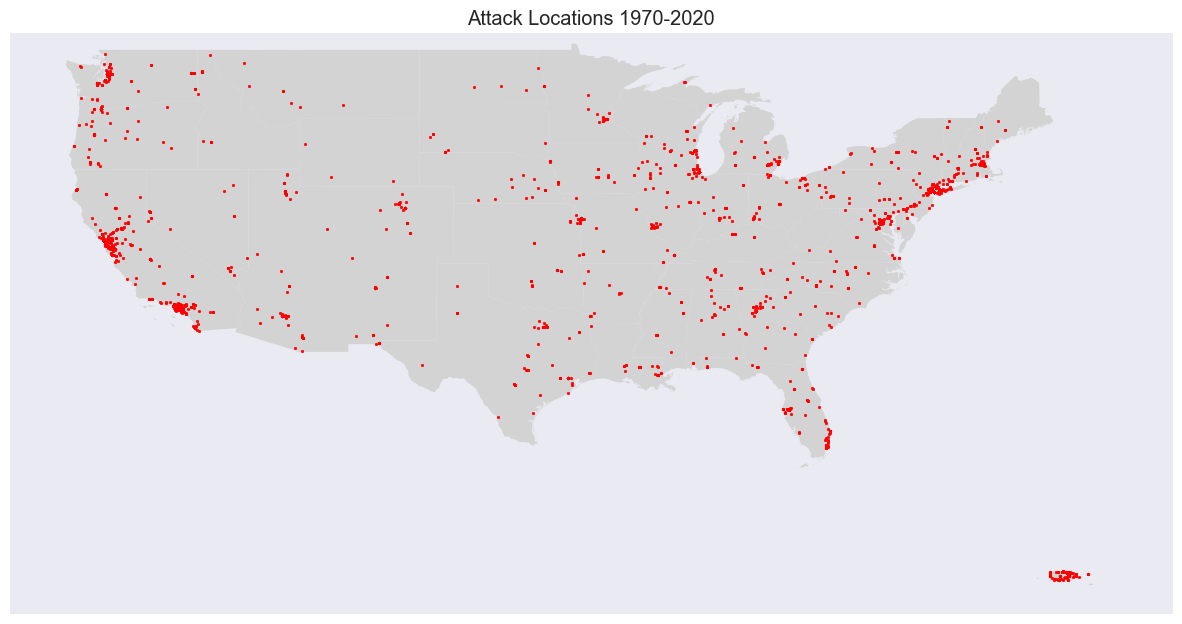

In [226]:
# Plot the map and the points

fig, ax = plt.subplots(figsize=(15, 10))

usa_no_alaska_hi.plot(ax=ax, color = 'lightgray')
us_attack_loc_gdf.plot(ax=ax,color = 'red', markersize=3, marker='o')

ax.set_xlim(-128, -60)
ax.set_ylim(16, 50)

ax.set_xticklabels([])
ax.set_yticklabels([])

# Add titles and labels
plt.title('Attack Locations 1970-2020')


#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

# Show the plot
plt.show()

### <a id='toc4_1_2_'></a>[Which states/ cities have the most attacks?](#toc0_)

In [227]:
usa_df['provstate'].value_counts()

provstate
California              632
New York                541
Puerto Rico             248
Florida                 176
Washington              119
Illinois                115
Texas                    89
District of Columbia     88
Oregon                   72
Massachusetts            68
Ohio                     58
Pennsylvania             50
Michigan                 50
New Jersey               50
Colorado                 48
Missouri                 46
Arizona                  44
Virginia                 43
Wisconsin                43
Georgia                  42
Maryland                 42
North Carolina           35
Tennessee                34
Louisiana                28
Minnesota                28
Indiana                  26
New Mexico               25
Nebraska                 24
Nevada                   24
Iowa                     24
Utah                     22
Connecticut              19
Alabama                  17
Oklahoma                 15
Mississippi              14
Idaho     

In [228]:
usa_df['city'].value_counts()

usa_attack_city_counts=pd.DataFrame(usa_df['city'].value_counts())
usa_attack_city_counts = usa_attack_city_counts.reset_index()
usa_attack_city_counts.sort_values(by='count', ascending=False, inplace= True)

usa_attack_city_counts.head(60)

,city,count
0,New York City,478
1,San Juan,116
2,Los Angeles,113
3,San Francisco,102
4,Washington,89
5,Miami,87
6,Chicago,59
7,Seattle,43
8,Berkeley,34
9,Portland,26


### <a id='toc4_1_3_'></a>[Types of attacks?](#toc0_)

In [487]:
usa_df['attacktype1_txt'].value_counts()


attacktype1_txt
Bombing/Explosion                      1419
Facility/Infrastructure Attack          983
Armed Assault                           372
Assassination                           135
Unarmed Assault                          92
Hostage Taking (Barricade Incident)      67
Hostage Taking (Kidnapping)              23
Hijacking                                19
Unknown                                  11
Name: count, dtype: int64

In [502]:
#find the attack subypes for each category

attack_sub_types = usa_df[usa_df['attacktype1_txt']=='Unarmed Assault']

attack_sub_types['weapsubtype1_txt'].value_counts()


298     Blunt Object
604     Blunt Object
2376    Blunt Object
2439             NaN
3487             NaN
Name: weapsubtype1_txt, dtype: object

In [522]:
cats = ['Bombs', 'Facility Attacks', 'Armed Assaults', 'Assassinations','Unarmed Assault','Hostage Taking', 'Hijacking/Unknown']
values = [45.5, 31.5, 11.9, 4.3, 2.9, 2.8, 1]

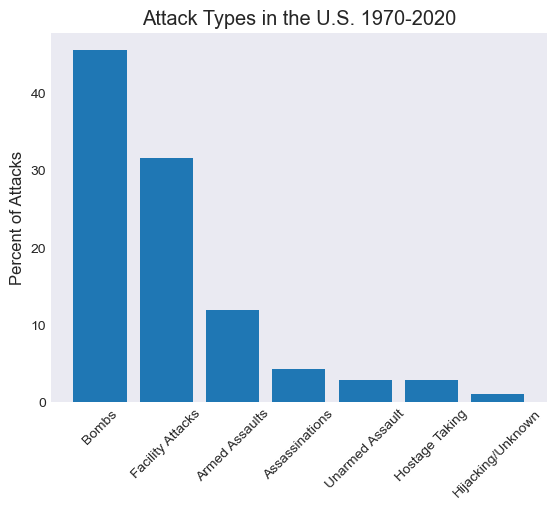

In [525]:
plt.bar(cats, values, color = 'tab:blue')

plt.title("Attack Types in the U.S. 1970-2020")

#plt.xlabel('Type')
plt.ylabel('Percent of Attacks')

plt.xticks(rotation =  45)

plt.show()

### <a id='toc4_1_4_'></a>[Types of targets?](#toc0_)

In [454]:
target_type_counts_us=pd.DataFrame(usa_df['targtype1_txt'].value_counts())
target_type_counts_us = target_type_counts_us.reset_index()
target_type_counts_us.sort_values(by='count', ascending=False, inplace= True)

target_type_counts_us.head(40)

,targtype1_txt,count
0,Business,816
1,Private Citizens & Property,422
2,Government (General),352
3,Abortion Related,257
4,Religious Figures/Institutions,233
5,Police,202
6,Military,193
7,Educational Institution,178
8,Government (Diplomatic),148
9,Utilities,89


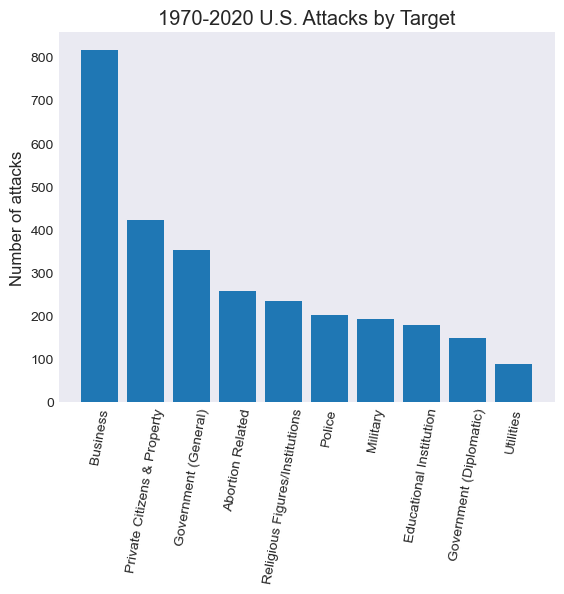

In [534]:
plt.bar(target_type_counts_us['targtype1_txt'].head(10),target_type_counts_us['count'].head(10), color='tab:blue')


plt.ylabel('Number of attacks')

plt.xticks(rotation = 80)

plt.title('1970-2020 U.S. Attacks by Target')

plt.show()

### <a id='toc4_1_5_'></a>[Average killed and wounded?](#toc0_)

In [230]:
mean_killed_usa = round(usa_df['nkill'].mean(),1)
print(f'The average number of deaths in an attack in the U.S. is {mean_killed_usa}.')

mean_wounded_usa = round(usa_df['nwound'].mean(),1)
print(f'The average number of wounded in an attack in the U.S. is {mean_wounded_usa}.')

The average number of deaths in an attack in the U.S. is 1.3.
The average number of wounded in an attack in the U.S. is 8.7.


In [231]:
#Number of groups included in the data on the USA

num_groups = len(usa_df['gname'].unique())
print(f'There are {num_groups} different groups included in the data set for the US from 1970-2020.')

There are 244 different groups included in the data set for the US from 1970-2020.


### <a id='toc4_1_6_'></a>[Top 10 US attacks - fatalities](#toc0_)

In [234]:
usa_df['nkill'].value_counts()

us_death_count =pd.DataFrame(usa_df['nkill'].value_counts())
us_death_count = us_death_count.reset_index()
us_death_count.sort_values(by='nkill', ascending=False, inplace= True)
#us_death_count.head(40)

In [233]:
top_10_index = us_death_count.index[:10].tolist()

group_name = []
n_killed = []
attack_year = []
attack_type = []

for index in top_10_index:
    
    deaths = us_death_count.loc[index]['nkill']
    n_killed.append(deaths)
    data = usa_df[usa_df['nkill']== deaths]

    group_name.append(data['gname'].iloc[0])
    attack_year.append(data['iyear'].iloc[0])
    attack_type.append(data['weaptype1_txt'].iloc[0])



In [235]:
#adjust the first item in the list for account for deaths in both towers on 9/11 - the data treats each tower as a separate attack
n_killed[0] = n_killed[0]*2

9/11 is the deadliest attack in the data set when all 4 attacks are combined. 

In [236]:
incident_names = ['9/11', '9/11 Pentagon','Oklahoma City Bombing','Mandalay Bay LV Shooting','Pulse Nightclub Shooting', '9/11 Flight 93', 'Lubys Cafeteria Shooting', 'El Paso Walmart Shooting',' Parkland Shooting','San Bernadino Shooting' ]

In [237]:
for index in range(10):
    year = attack_year[index]
    name = incident_names[index]
    group = group_name[index]
    killed = int(n_killed[index])

    print(f'{year} - {name} - {group} - {killed} fatalities')
    

2001 - 9/11 - Al-Qaida - 2770 fatalities
2001 - 9/11 Pentagon - Al-Qaida - 190 fatalities
1995 - Oklahoma City Bombing - Anti-Government extremists - 168 fatalities
2017 - Mandalay Bay LV Shooting - Anti-Government extremists - 60 fatalities
2016 - Pulse Nightclub Shooting - Jihadi-inspired extremists - 50 fatalities
2001 - 9/11 Flight 93 - Al-Qaida - 44 fatalities
1991 - Lubys Cafeteria Shooting - Male supremacists - 24 fatalities
2019 - El Paso Walmart Shooting - White supremacists/nationalists - 23 fatalities
2018 -  Parkland Shooting - White supremacists/nationalists - 17 fatalities
2015 - San Bernadino Shooting - Jihadi-inspired extremists - 16 fatalities


### <a id='toc4_1_7_'></a>[What group has caused the most deaths?](#toc0_)

In [238]:
top_kill_count = 0
group = ''

for name in usa_df['gname'].unique():
   data= usa_df[usa_df['gname']==name]
   kills = int(data['nkill'].sum())

   if kills > top_kill_count:
      top_kill_count = kills
      group = name

In [239]:
print(f'The terrorist groups with the highest body count is {group}, with {top_kill_count} deaths.')

The terrorist groups with the highest body count is Al-Qaida, with 3004 deaths.


### <a id='toc4_1_8_'></a>[Average casualties per attack?](#toc0_)

In [240]:
total_deaths = us_death_count['count'].sum()
no_deaths = 2726
one_or_fewer_deaths = 2950

print(f'{round((no_deaths/total_deaths*100),1)}% of US attacks resulted in no deaths.')
print(f'{round((one_or_fewer_deaths/total_deaths*100),1)}% of US attacks resulted in one or no deaths.')

89.3% of US attacks resulted in no deaths.
96.7% of US attacks resulted in one or no deaths.


In [248]:
usa_df['nwound'].value_counts()

us_wound_count =pd.DataFrame(usa_df['nwound'].value_counts())
us_wound_count = us_wound_count.reset_index()
us_wound_count.sort_values(by='nwound', ascending=True, inplace= True)

us_wound_count.head(50)



,nwound,count
0,0.0,2597
1,1.0,216
2,2.0,65
3,3.0,42
4,4.0,22
5,5.0,13
6,6.0,7
9,7.0,7
8,8.0,7
7,9.0,7


In [242]:
total_wounds = us_wound_count['count'].sum()
no_wounds = 2597
one_or_fewer_wounds = 2813

print(f'{round((no_wounds/total_wounds*100),1)}% of US attacks resulted in no wounds.')
print(f'{round((one_or_fewer_wounds/total_wounds*100),1)}% of US attacks resulted in one or no wounds.')

85.7% of US attacks resulted in no wounds.
92.8% of US attacks resulted in one or no wounds.


In [246]:
#Which attacks resulted in no wounds and no deaths? 

total_attacks = len(usa_df)
total_no_casualties = len(usa_df[(usa_df['nkill']==0)& (usa_df['nwound']==0)])

percent_no_causalties = round((total_no_casualties/total_attacks)*100,1)

print(f'{percent_no_causalties}% or attacks in the US data have no casualties at all')

77.1% or attacks in the US data have no casualties at all


In [254]:
#Which attacks resulted in 1 wound and no deaths? 

total_one_wound = len(usa_df[(usa_df['nkill']==0)& (usa_df['nwound']<= 1)])

percent_one_causalty = round((total_one_wound/total_attacks)*100,1)

print(f'{percent_one_causalty}% or attacks in the US data result in either no wounds or a single wound and no deaths')

82.9% or attacks in the US data result in either no wounds or a single wound and no deaths


### <a id='toc4_1_9_'></a>[Examples of the average attack](#toc0_)

In [520]:
typical_attack = usa_df[(usa_df['nkill'] == 0) & (usa_df['doubtterr']==0) & (usa_df['nwound']==0)]

typical_attack_2012 = typical_attack[typical_attack['iyear']==2012]

typical_attack_2012.head(20)

print(typical_attack_2012.iloc[8].summary)
print(typical_attack_2012.iloc[14].summary)
print(typical_attack_2012.iloc[15].summary)

05/20/2012: Assailants set fire to the Atlanta Gynecology and Obstetrics clinic in Lilburn, Georgia, United States. There were no reported casualties in the attack. No group claimed responsibility for the incident.
09/30/2012: Randolph T. Linn set fire to the area where men pray in the main room of the Islamic Center of Greater Toledo in Perrysburg, Ohio, United States. Sprinklers were able to douse the fire, but significant damage to the center was done. No group claimed responsibility for the incident.
11/30/2012: A small incendiary device exploded at the entrance of a Social Security Administration building in Casa Grande, Arizona, United States. No one was injured in the blast, although the building was slightly damaged. An Iraqi civilian, Abdullatif Ali Aldosary, was taken into custody in connection with the incident.


### <a id='toc4_1_10_'></a>[Who is carrying out attacks in the US?](#toc0_)

In [255]:
usa_df['gname'].value_counts()

usa_attack_perp_counts=pd.DataFrame(usa_df['gname'].value_counts())
usa_attack_perp_counts = usa_attack_perp_counts.reset_index()
usa_attack_perp_counts.sort_values(by='count', ascending=False, inplace= True)

usa_attack_perp_counts.head(50)

,gname,count
0,Unknown,606
1,Anti-Abortion extremists,234
2,Left-Wing Militants,169
3,White supremacists/nationalists,131
4,Fuerzas Armadas de Liberacion Nacional (FALN),120
5,New World Liberation Front (NWLF),86
6,Black Nationalists,83
7,Animal Liberation Front (ALF),76
8,Jewish Defense League (JDL),74
9,Student Radicals,71


Anti-abortion extremeists are number one in terms of attacks- what kind of attacks and casualties are they causing? 

In [259]:
abortion_extremists = usa_df[usa_df['gname']=='Anti-Abortion extremists']

234


In [ ]:
#Most attacks by year

In [ ]:
#Weapons

In [ ]:
#Target types

### <a id='toc4_1_11_'></a>[How long are groups in the US active](#toc0_)

In [256]:
group_active_years_dict = {'Group':[],'Start':[],'End':[], 'Years_active':[]}

for group in usa_df['gname'].unique():
    group_active_years_dict['Group'].append(group)

    df = usa_df[usa_df['gname']== group]

    start_year = df['iyear'].min()
    group_active_years_dict['Start'].append(start_year)

    end_year=df['iyear'].max()
    group_active_years_dict['End'].append(end_year)

    years_active = end_year - start_year

    if years_active > 0:
        group_active_years_dict['Years_active'].append(years_active)

    else:
        group_active_years_dict['Years_active'].append(1)
    

In [257]:
group_years_active_df = pd.DataFrame(group_active_years_dict)

In [258]:
group_years_active_df.value_counts()
group_years_active_df.sort_values(by='Years_active', ascending=False, inplace= True)

group_years_active_df.head(50)

,Group,Start,End,Years_active
8,White supremacists/nationalists,1970,2020,50
1,Unknown,1970,2020,50
10,Ku Klux Klan,1970,2020,50
38,Left-wing extremists,1971,2020,49
32,Neo-Nazi extremists,1970,2019,49
24,Right-wing extremists,1970,2017,47
68,Anti-Government extremists,1974,2020,46
95,Anti-Abortion extremists,1977,2020,43
157,Anti-Muslim extremists,1985,2020,35
172,Animal Rights extremists,1988,2019,31


#### <a id='toc4_1_11_1_'></a>[Active groups by decade](#toc0_)

In [290]:
active_70s= []
active_80s = []
active_90s = []
active_2000s = []
active_2010s = []


for group in usa_df['gname'].unique():
    df = usa_df[usa_df['gname']==group]

    years = df['iyear']

    for year in years:
        if year >= 1970 and year < 1980:
            active_70s.append(group)
        elif  year >= 1980 and year < 1990:
            active_80s.append(group)
        elif  year >= 1990 and year < 2000:
            active_90s.append(group)
        elif  year >= 2000 and year < 2010:
            active_2000s.append(group)
        elif  year >= 2010 and year <= 2020:
           active_2010s.append(group)


In [291]:
print(f'The data shows {len(set(active_70s))} different groups active in the 1970\'s')
print(f'The data shows {len(set(active_80s))} different groups active in the 1980\'s')
print(f'The data shows {len(set(active_90s))} different groups active in the 1990\'s')
print(f'The data shows {len(set(active_2000s))} different groups active in the 2000\'s')
print(f'The data shows {len(set(active_2010s))} different groups active in the 2010\'s')

The data shows 122 different groups active in the 1970's
The data shows 77 different groups active in the 1980's
The data shows 49 different groups active in the 1990's
The data shows 25 different groups active in the 2000's
The data shows 51 different groups active in the 2010's


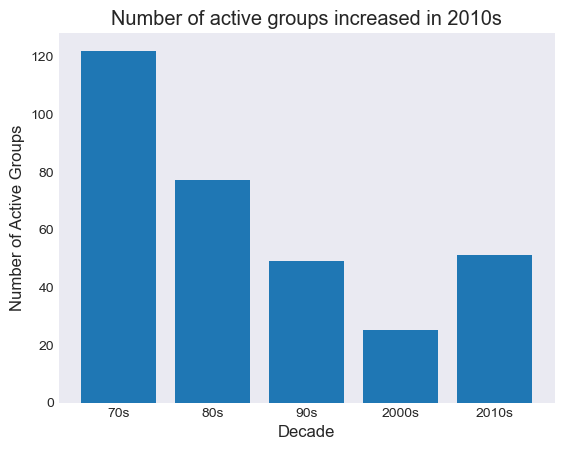

In [299]:
decades = ['70s','80s','90s','2000s','2010s']
num_active = [len(set(active_70s)),len(set(active_80s)),len(set(active_90s)),len(set(active_2000s)),len(set(active_2010s))]

plt.bar(decades, num_active, color = 'tab:blue')

plt.title('Number of active groups increased in 2010s')

plt.xlabel('Decade')
plt.ylabel('Number of Active Groups')

plt.show()

### <a id='toc4_1_12_'></a>[How long are groups active?](#toc0_)

In [300]:
bins=[0,1,5,10,15,20,30,40,50]

group_years_active_df['bins'] = pd.cut(group_years_active_df['Years_active'],bins)

In [293]:
group_years_active_df['bins'].value_counts()

bins
(0, 1]      156
(1, 5]       39
(5, 10]      14
(20, 30]      9
(10, 15]      8
(15, 20]      8
(40, 50]      8
(30, 40]      2
Name: count, dtype: int64

In [294]:
group_years_active_df['bins'].value_counts()

years_active_counts=pd.DataFrame(group_years_active_df['bins'].value_counts())
years_active_counts = years_active_counts.reset_index()
years_active_counts.sort_values(by='bins', ascending=True, inplace= True)

years_active_counts.head(50)



,bins,count
0,"(0, 1]",156
1,"(1, 5]",39
2,"(5, 10]",14
4,"(10, 15]",8
5,"(15, 20]",8
3,"(20, 30]",9
7,"(30, 40]",2
6,"(40, 50]",8


In [295]:
years = ['1 or less','1-5','5-10','10-15','15-20','20-30','30-40','40-50']

years_active_counts['years'] = years

years_active_counts.head()

,bins,count,years
0,"(0, 1]",156,1 or less
1,"(1, 5]",39,1-5
2,"(5, 10]",14,5-10
4,"(10, 15]",8,10-15
5,"(15, 20]",8,15-20


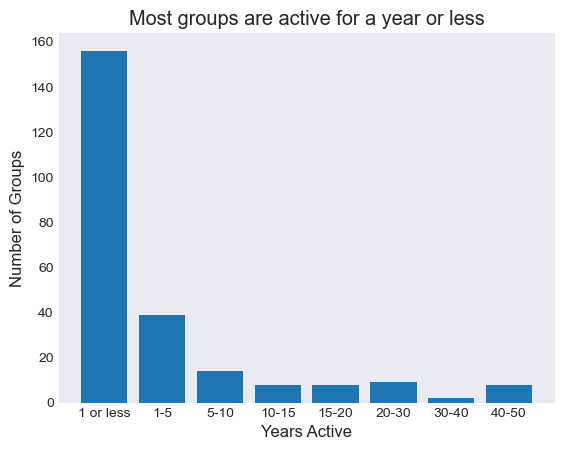

In [444]:
plt.bar(years_active_counts['years'],years_active_counts['count'], color ='tab:blue')

plt.title("Most groups are active for a year or less")

plt.xlabel('Years Active')
plt.ylabel('Number of Groups')

plt.show()



### <a id='toc4_1_13_'></a>[Average number of attacks per group](#toc0_)

In [301]:
usa_attack_perp_counts.head()

,gname,count
0,Unknown,606
1,Anti-Abortion extremists,234
2,Left-Wing Militants,169
3,White supremacists/nationalists,131
4,Fuerzas Armadas de Liberacion Nacional (FALN),120


In [302]:
#Average number of attacks by a group - There is one line per attack

total_attacks = usa_attack_perp_counts['count'].sum()
total_groups = len(usa_attack_perp_counts['gname'])
avg_num_attacks = round(total_attacks/total_groups,1)

print(f'The average group carries out {avg_num_attacks} attacks')

The average group carries out 12.8 attacks


In [303]:
bins=[0,1,5,10,20,50,100,200,500,700]

usa_attack_perp_counts['bins'] = pd.cut(usa_attack_perp_counts['count'],bins)

In [304]:
usa_attack_perp_counts.head()

,gname,count,bins
0,Unknown,606,"(500, 700]"
1,Anti-Abortion extremists,234,"(200, 500]"
2,Left-Wing Militants,169,"(100, 200]"
3,White supremacists/nationalists,131,"(100, 200]"
4,Fuerzas Armadas de Liberacion Nacional (FALN),120,"(100, 200]"


In [305]:
num_attack_counts=pd.DataFrame(usa_attack_perp_counts['bins'].value_counts())
num_attack_counts = num_attack_counts.reset_index()
num_attack_counts.sort_values(by='bins', ascending=True, inplace= True)

num_attack_counts.head(50)

,bins,count
1,"(0, 1]",86
0,"(1, 5]",87
2,"(5, 10]",23
3,"(10, 20]",20
4,"(20, 50]",15
5,"(50, 100]",8
6,"(100, 200]",3
7,"(200, 500]",1
8,"(500, 700]",1


In [306]:
num_attacks = ['1','2-5','6-10','11-20','21-50','51-100','101-200','201-500','501+']

num_attack_counts['num_attack'] = num_attacks

num_attack_counts.head()

,bins,count,num_attack
1,"(0, 1]",86,1
0,"(1, 5]",87,2-5
2,"(5, 10]",23,6-10
3,"(10, 20]",20,11-20
4,"(20, 50]",15,21-50


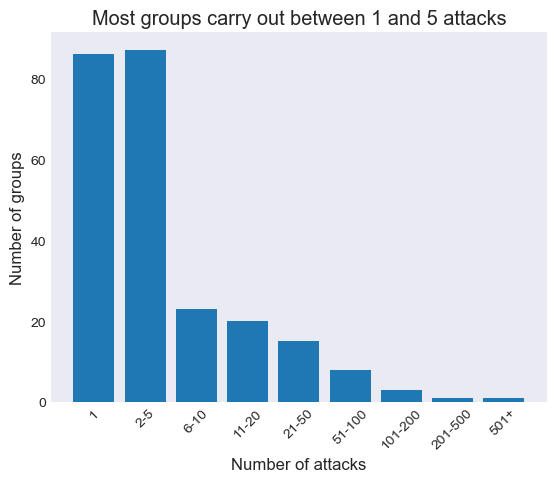

In [309]:
plt.bar(num_attack_counts['num_attack'],num_attack_counts['count'], color = 'tab:blue')

plt.xticks(rotation=45)

plt.title("Most groups carry out between 1 and 5 attacks")

plt.xlabel('Number of attacks')
plt.ylabel('Number of groups')


plt.show()

# <a id='toc5_'></a>[1970s vs 2010s Analysis](#toc0_)

### <a id='toc5_1_1_'></a>[Total Number of Attacks 70’s vs. 2010](#toc0_)

In [453]:
total_70s_attacks = usa_df[usa_df['iyear'].isin([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979])]
print(f'There were {len(total_70s_attacks)} attacks in the 1970s.')

total_2010s_attacks = usa_df[usa_df['iyear'].isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
print(f'There were {len(total_2010s_attacks)} attacks in the 2010s.')

There were 1475 attacks in the 1970s.
There were 523 attacks in the 2010s.


### <a id='toc5_1_2_'></a>[Number of Groups Active 70’s vs. 2010](#toc0_)

In [310]:
set_70s = set(active_70s)
set_2010s = set(active_2010s)

In [311]:
groups_in_common = set_70s.intersection(set_2010s)
groups_not_in_common = set_70s.symmetric_difference(set_2010s)

In [312]:
print(len(groups_in_common))
print((groups_in_common))

8
{'Ku Klux Klan', 'White supremacists/nationalists', 'Neo-Nazi extremists', 'Left-wing extremists', 'Anti-Government extremists', 'Anti-Abortion extremists', 'Right-wing extremists', 'Unknown'}


In [313]:
print(len(groups_not_in_common))
print((groups_not_in_common))

157
{'ROSADO-SOTO Command', 'Strikers', 'Anti-Castro Command', 'Black Afro Militant Movement', 'Left-Wing Militants', 'Anti-Arab extremists', 'Hawaiian extremists', 'Black Liberation Army', 'Jonathan Jackson Brigade', 'BAY Bombers', 'Cuban Action', "People's Revolutionary Party", 'Youth of the Star', "People's Liberation Army (United States)", 'M-7', 'Armed Forces of Popular Resistance (FARP)', 'Anti-Muslim extremists', 'Pro-LGBT Rights extremists', 'Court Reform extremists', 'Animal Liberation Front (ALF)', 'Conspiracy theory extremists', 'Anarchists', 'Symbionese Liberation Army (SLA)', 'Omega-7', 'New Jewish Defense League', 'White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia', 'The World United Formosans for Independence (WUFI)', 'Boogaloo movement', 'Students For Insurrection', 'Cuban C-4 Movement', 'Puerto Rican Nationalists', 'Anti-globalization extremists', 'Hanafi Muslims', 'Anti-Trump extremists', 'Latin America Anti-Communist Army (LAACA)', 'Sovereign Citiz

In [314]:
groups_limited_to_70s = []
groups_limited_to_2010s=[]

for group in groups_not_in_common:
    if group in set_70s and group not in groups_in_common:
        groups_limited_to_70s.append(group)
    elif group in set_2010s and group not in groups_in_common:
        groups_limited_to_2010s.append(group)

In [425]:
print(f'The data contains at least one attack from {len(groups_limited_to_70s)} different groups in the 1970s.')
print(f'The data contains at least one attack from {len(groups_limited_to_2010s)} different groups in the 2010s.')

The data contains at least one attack from 114 different groups in the 1970s.
The data contains at least one attack from 43 different groups in the 2010s.


In [316]:
print(groups_limited_to_70s)

['ROSADO-SOTO Command', 'Strikers', 'Anti-Castro Command', 'Black Afro Militant Movement', 'Left-Wing Militants', 'Hawaiian extremists', 'Black Liberation Army', 'Jonathan Jackson Brigade', 'BAY Bombers', 'Cuban Action', "People's Revolutionary Party", 'Youth of the Star', "People's Liberation Army (United States)", 'M-7', 'Armed Forces of Popular Resistance (FARP)', 'Symbionese Liberation Army (SLA)', 'Omega-7', 'New Jewish Defense League', 'The World United Formosans for Independence (WUFI)', 'Cuban C-4 Movement', 'Puerto Rican Nationalists', 'Hanafi Muslims', 'Latin America Anti-Communist Army (LAACA)', 'Puerto Rican Revolutionary Movement', 'Arabs', 'Macheteros', 'Armenian Group', 'Weather Underground, Weathermen', 'National Socialist Liberation Front', 'Secret Cuban Government', 'National Integration Front (FIN)', 'American Indian Movement', 'Revolutionary Force 26', 'Armed Commandos of Liberation', 'Americans for Justice', 'Irish Republican Army (IRA)', 'Jewish Extremists', 'Quar

In [317]:
usa_70s_actvive_df = usa_df[usa_df['gname'].isin(groups_limited_to_70s)]
usa_2010s_actvive_df = usa_df[usa_df['gname'].isin(groups_limited_to_2010s)]

### <a id='toc5_1_3_'></a>[Weapons used 70’s vs. 2010s](#toc0_)

In [318]:
#make a df of the groups limited to the 1970s and 2010s - filter the years

attacks_1970s = usa_df[(usa_df['iyear'] >=1970)&(usa_df['iyear'] < 1980)]
attacks_2010s = usa_df[(usa_df['iyear'] >=2010)&(usa_df['iyear'] <= 2020)]

attacks_2010s.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
95408,201002170017,2010,2,17,NaN,0,NaT,217,United States,1,...,NaN,"My Fox Tampa Bay, ""Acid Bombs Planted at Resta...","St. Petersburg Times, ""Boy's Acid Bomb Separat...","St. Petersburg Times, ""Camera Catches Trio of ...",ISVG,-9,-9,0,-9,NaN
95426,201002180013,2010,2,18,NaN,0,NaT,217,United States,1,...,NaN,"Fox News, ""Pilot Crashers into Texas Building ...","Associated Press, ""Crews Find Body in Building...","Xinhua News Agency, ""Austin Small Plance Crash...",ISVG,-9,-9,0,-9,NaN
95535,201002250007,2010,2,25,NaN,0,NaT,217,United States,1,...,NaN,"Wall Street Journal, ""Amputee Arrested in Alle...","Wall Street Journal, ""Police Arrest Amputee in...",NaN,ISVG,-9,-9,0,-9,NaN
95622,201003040016,2010,3,4,NaN,0,NaT,217,United States,1,...,The mental state of Bedell and his motive for ...,"Allison Klein, Clarence Williams, and Martin W...","Anahad O'Connor and Ian Urbina, ""Gunman Wounds...","Gordon Lubold, ""Col. James Sabow: Pentagon sho...",UMD Miscellaneous,-9,-9,0,-9,NaN
96301,201004300006,2010,4,30,NaN,0,NaT,217,United States,1,...,NaN,"Animal Liberation Press Office, ""Sheepskin Fac...","Denver Channel, ""Suspect Arrested In Sheepskin...","CBS 4 Denver, ""Arrest Made In Sheepskin Factor...",ISVG,0,1,0,1,NaN


In [319]:
attack_type_counts_70s=pd.DataFrame(attacks_1970s['attacktype1_txt'].value_counts())
attack_type_counts_70s = attack_type_counts_70s.reset_index()
attack_type_counts_70s.sort_values(by='count', ascending=False, inplace= True)

attack_type_counts_70s.head(20)

,attacktype1_txt,count
0,Bombing/Explosion,925
1,Facility/Infrastructure Attack,315
2,Armed Assault,124
3,Assassination,67
4,Hostage Taking (Barricade Incident),18
5,Hostage Taking (Kidnapping),10
6,Hijacking,7
7,Unarmed Assault,6
8,Unknown,3


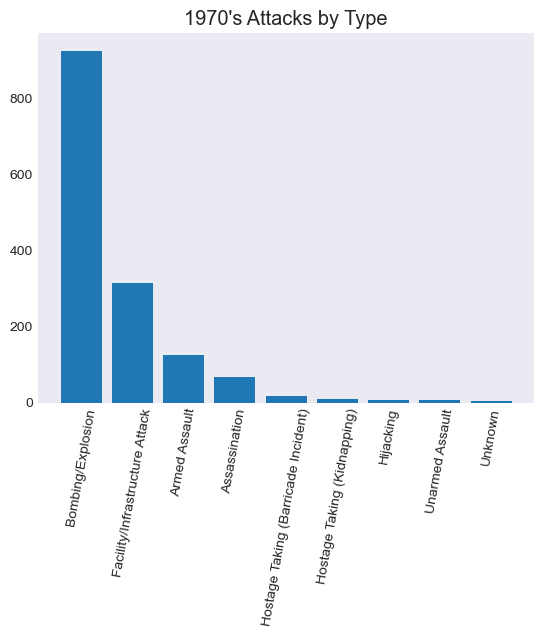

In [321]:
plt.bar(attack_type_counts_70s['attacktype1_txt'].head(20),attack_type_counts_70s['count'].head(20), color = 'tab:blue')

plt.xticks(rotation = 80)

plt.title('1970\'s Attacks by Type')

plt.show()

In [322]:
#attacks_2010s

attack_type_counts_2010s=pd.DataFrame(attacks_2010s['attacktype1_txt'].value_counts())
attack_type_counts_2010s = attack_type_counts_2010s.reset_index()
attack_type_counts_2010s.sort_values(by='count', ascending=False, inplace= True)

attack_type_counts_2010s.head(40)

,attacktype1_txt,count
0,Facility/Infrastructure Attack,230
1,Armed Assault,157
2,Bombing/Explosion,72
3,Unarmed Assault,43
4,Hostage Taking (Barricade Incident),8
5,Assassination,6
6,Hostage Taking (Kidnapping),4
7,Hijacking,3


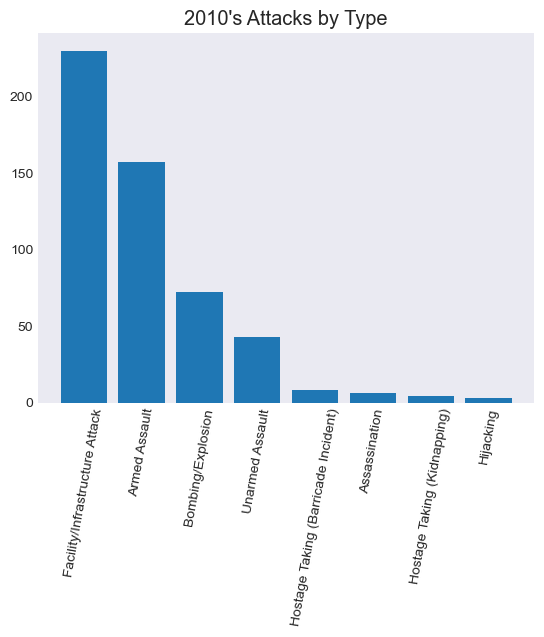

In [326]:
plt.bar(attack_type_counts_2010s['attacktype1_txt'].head(20),attack_type_counts_2010s['count'].head(20), color = 'tab:blue')

plt.xticks(rotation = 80)

plt.title('2010\'s Attacks by Type')

plt.show()

In [341]:
#Convert the different attack numbers to percentages so that we can compare the types of attacks side by side. 

def convert_to_percent(values, total_len, round_dec):
    '''
    values is a list of the values to be converted
    total_len is the total number of object of which each item in values is some percent
    round is an int specifying how many decimals to round to

    the function returns a new list where every item a percentage rounded to the first decimal
    '''
    

    percents = []

    for item in values:
        percent = round((item/total_len)*100,round_dec)
        percents.append(percent)


    return percents

In [344]:
attack_type_percents_70s = convert_to_percent(attack_type_counts_70s['count'].head(20).tolist(), len(attacks_1970s),1)
attack_type_percents_2010s = convert_to_percent([72, 230, 157, 6, 8,4, 3,43, 0], len(attacks_2010s),1)

In [345]:
attack_type_percents_2010s

[13.8, 44.0, 30.0, 1.1, 1.5, 0.8, 0.6, 8.2, 0.0]

In [476]:
# Data for the bar chart
categories = attack_type_counts_70s['attacktype1_txt'].head(20).tolist()
values1 = attack_type_percents_70s
values2 = attack_type_percents_2010s

categories.reverse()
values1.reverse()
values2.reverse()

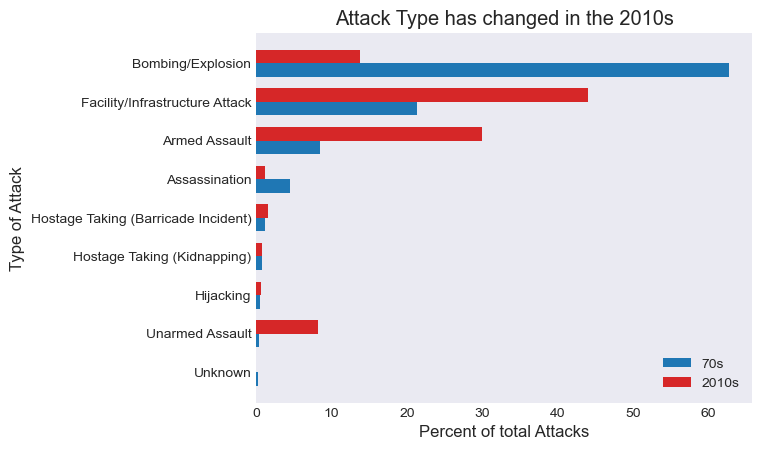

In [480]:

# Define the width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar chart
fig, ax = plt.subplots()
bars1 = ax.barh(categories, attack_type_percents_70s, color='tab:blue', height=bar_width, label='70s')
bars2 = ax.barh(r2, attack_type_percents_2010s, color='tab:red', height=bar_width, label='2010s')

# Add labels
ax.set_xlabel('Percent of total Attacks')
ax.set_ylabel('Type of Attack')
ax.set_title('Attack Type has changed in the 2010s')
ax.set_yticks([r + bar_width / 2 for r in range(len(categories))])
ax.set_yticklabels(categories)
ax.legend(loc = 'lower right')

plt.show()


Based on the below - The facility attacks are almost all arson or involve firearms - This was true in the 1970's and today

In [351]:
#what are all the unarmed assaults in 2010

unarmed_assaults_2010s = attacks_2010s[attacks_2010s['attacktype1_txt'] == 'Unarmed Assault']

#What what type of attacks are conducted against facilities
facility_assaults_1970s = attacks_1970s[attacks_1970s['attacktype1_txt'] == 'Facility/Infrastructure Attack']
facility_assaults_2010s = attacks_2010s[attacks_2010s['attacktype1_txt'] == 'Facility/Infrastructure Attack']

for notes in unarmed_assaults_2010s['weaptype1_txt']:
    print(notes)

Biological
Biological
Biological
Biological
Chemical
Melee
Melee
Melee
Melee
Melee
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Melee
Chemical
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Melee
Melee
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Melee
Melee
Melee
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Chemical
Chemical
Chemical
Melee
Melee
Melee
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Chemical
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Melee
Chemical
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)
Chemical
Vehicle (not to include vehicle-bo

### <a id='toc5_1_4_'></a>[Difference in targets 70’s vs. 2010s](#toc0_)

In [352]:

target_type_counts_2010s=pd.DataFrame(attacks_2010s['targtype1_txt'].value_counts())
target_type_counts_2010s = target_type_counts_2010s.reset_index()
target_type_counts_2010s.sort_values(by='count', ascending=False, inplace= True)

target_type_counts_2010s.head(40)

,targtype1_txt,count
0,Religious Figures/Institutions,149
1,Private Citizens & Property,136
2,Police,54
3,Business,53
4,Government (General),47
5,Educational Institution,17
6,Abortion Related,16
7,Military,12
8,Utilities,8
10,Telecommunication,6


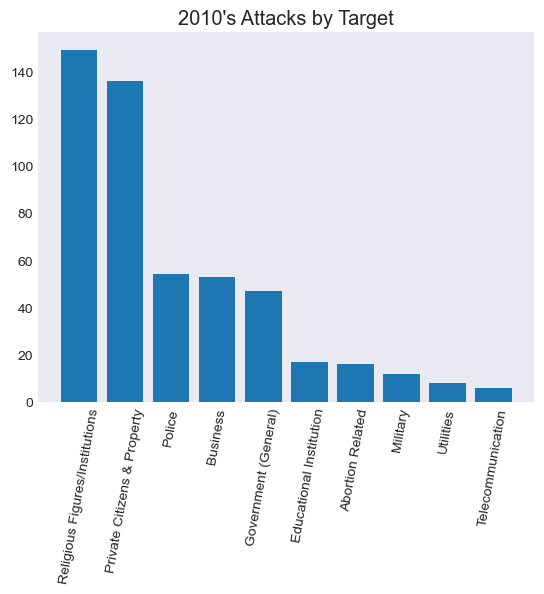

In [373]:
plt.bar(target_type_counts_2010s['targtype1_txt'].head(10),target_type_counts_2010s['count'].head(10), color = 'tab:blue')

plt.xticks(rotation = 80)

plt.title('2010\'s Attacks by Target')

plt.show()

In [354]:
attacks_2010s['targsubtype1_txt'].value_counts()

targsubtype1_txt
Place of Worship                                                           134
Race/Ethnicity Identified                                                   31
Police Security Forces/Officers                                             28
Religion Identified                                                         17
Unnamed Civilian/Unspecified                                                17
                                                                          ... 
Fire Fighter/Truck                                                           1
Military Transportation/Vehicle (excluding convoys)                          1
Public Area (garden, parking lot, garage, beach, public building, camp)      1
Gas                                                                          1
Non-State Militia                                                            1
Name: count, Length: 62, dtype: int64

In [355]:
target_type_counts_1970s=pd.DataFrame(attacks_1970s['targtype1_txt'].value_counts())
target_type_counts_1970s = target_type_counts_1970s.reset_index()
target_type_counts_1970s.sort_values(by='count', ascending=False, inplace= True)

target_type_counts_1970s.head(40)

,targtype1_txt,count
0,Business,466
1,Government (General),190
2,Private Citizens & Property,145
3,Police,133
4,Military,127
5,Educational Institution,105
6,Government (Diplomatic),98
7,Utilities,58
8,Airports & Aircraft,28
9,Religious Figures/Institutions,28


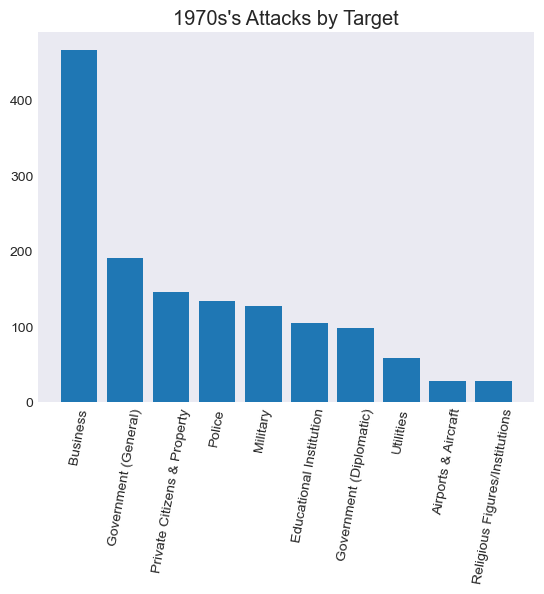

In [374]:
plt.bar(target_type_counts_1970s['targtype1_txt'].head(10),target_type_counts_1970s['count'].head(10), color='tab:blue')

plt.xticks(rotation = 80)

plt.title('1970s\'s Attacks by Target')

plt.show()

In [357]:
#USe groupby on target subtypes
attacks_1970s['targsubtype1_txt'].value_counts()

targsubtype1_txt
Bank/Commerce                             157
Retail/Grocery/Bakery                     141
Government Building/Facility/Office       123
School/University/Educational Building     97
Military Recruiting Station/Academy        55
                                         ... 
Non-State Militia                           1
Farm/Ranch                                  1
Affiliated Institution                      1
Teacher/Professor/Instructor                1
Protester                                   1
Name: count, Length: 75, dtype: int64

In [377]:
target_type_percents_70s = convert_to_percent(target_type_counts_1970s['count'].head(10).tolist(), len(attacks_1970s),1)
target_type_percents_2010s = convert_to_percent([53,47,136,54,12,17,1,8,6,149], len(attacks_2010s),1)

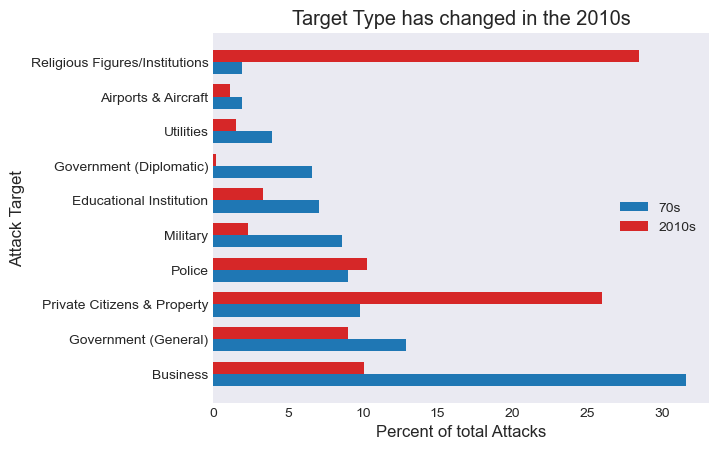

In [461]:
categories = target_type_counts_1970s['targtype1_txt'].head(10)

# Define the width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar chart
fig, ax = plt.subplots()
bars1 = ax.barh(categories, target_type_percents_70s, color='tab:blue', height=bar_width, label='70s')
bars2 = ax.barh(r2, target_type_percents_2010s, color='tab:red', height=bar_width, label='2010s')


# Add labels
ax.set_xlabel('Percent of total Attacks')
ax.set_ylabel('Attack Target')
ax.set_title('Target Type has changed in the 2010s')
ax.set_yticks([r + bar_width / 2 for r in range(len(categories))])
ax.set_yticklabels(categories)
ax.legend()

plt.show()

In [388]:
#example of an attack on a religious figure/ institution in the 2010s

religious_attacks_2010s=attacks_2010s[attacks_2010s['targtype1_txt']=='Religious Figures/Institutions']

print(len(religious_attacks_2010s))

print(religious_attacks_2010s.iloc[0].summary)
print(religious_attacks_2010s.iloc[10].summary)
print(religious_attacks_2010s.iloc[12].summary)
print(religious_attacks_2010s.iloc[15].summary)
print(religious_attacks_2010s.iloc[50].summary)

149
5/10/2010: In Jacksonville, Florida, United States a pipe bomb exploded at roughly 6:35 p.m. in a mosque during evening prayers. Sixty people were inside the building praying, but no one was injured or killed. There have been no claims of responsibility.
08/05/2012: An assailant opened fire on a Sikh temple in Oak Creek, Wisconsin, United States. At least seven people were killed and three other people were injured before the assailant was shot by a responding police officer and subsequently died from a self-inflicted gunshot wound. No group claimed responsibility; however, sources identifed the assailant, Wade Michael Page, as a member of a white supremacist organization.
09/30/2012: Randolph T. Linn set fire to the area where men pray in the main room of the Islamic Center of Greater Toledo in Perrysburg, Ohio, United States. Sprinklers were able to douse the fire, but significant damage to the center was done. No group claimed responsibility for the incident.
03/18/2014: Assaila

### <a id='toc5_1_5_'></a>[Fatalities comparison 70’s vs. 2010s](#toc0_)

In [358]:
fatalities_70s = int(attacks_1970s['nkill'].sum())
fatalities_2010s = int(attacks_2010s['nkill'].sum())

print(f'There were {fatalities_70s} deaths from attacks in the 1970s')
print(f'There were {fatalities_2010s} deaths from attacks in the 2010s')

There were 183 deaths from attacks in the 1970s
There were 390 deaths from attacks in the 2010s


In [359]:
death_counts_1970s=pd.DataFrame(attacks_1970s['nkill'].value_counts())
death_counts_1970s = death_counts_1970s.reset_index()
death_counts_1970s.sort_values(by='nkill', ascending=False, inplace= True)

death_counts_1970s.head(50)

,nkill,count
7,11.0,1
5,8.0,1
6,7.0,1
8,5.0,1
3,4.0,3
4,3.0,2
2,2.0,22
1,1.0,90
0,0.0,1312


In [360]:
death_counts_2010s=pd.DataFrame(attacks_2010s['nkill'].value_counts())
death_counts_2010s = death_counts_2010s.reset_index()
death_counts_2010s.sort_values(by='nkill', ascending=False, inplace= True)

death_counts_2010s.head(50)

,nkill,count
13,60.0,1
12,50.0,1
17,23.0,1
15,17.0,1
11,16.0,1
9,15.0,1
16,11.0,1
6,10.0,3
8,9.0,1
14,8.0,1


### <a id='toc5_1_6_'></a>[Attacks per group 70’s vs. 2010s](#toc0_)

In [361]:
attack_perp_counts_1970s=pd.DataFrame(attacks_1970s['gname'].value_counts())
attack_perp_counts_1970s = attack_perp_counts_1970s.reset_index()
attack_perp_counts_1970s.sort_values(by='count', ascending=False, inplace= True)

attack_perp_counts_1970s.head(50)

,gname,count
0,Unknown,219
1,Left-Wing Militants,169
2,Fuerzas Armadas de Liberacion Nacional (FALN),107
3,New World Liberation Front (NWLF),86
4,Black Nationalists,82
5,Student Radicals,71
6,White supremacists/nationalists,52
7,"Weather Underground, Weathermen",46
8,Jewish Defense League (JDL),44
9,Black Liberation Army,34


In [362]:
total_attacks = attack_perp_counts_1970s['count'].sum()
total_groups = len(attack_perp_counts_1970s['gname'])
avg_num_attacks = round(total_attacks/total_groups,1)

print(f'The average group carried out {avg_num_attacks} attacks in the 1970s')

The average group carried out 12.1 attacks in the 1970s


In [363]:
bins=[0,1,5,10,20,50,100,200,500,700]

attack_perp_counts_1970s['bins'] = pd.cut(attack_perp_counts_1970s['count'],bins)

In [364]:
num_attack_counts_1970s=pd.DataFrame(attack_perp_counts_1970s['bins'].value_counts())
num_attack_counts_1970s = num_attack_counts_1970s.reset_index()
num_attack_counts_1970s.sort_values(by='bins', ascending=True, inplace= True)

num_attack_counts_1970s.head(50)

,bins,count
1,"(0, 1]",38
0,"(1, 5]",48
2,"(5, 10]",11
3,"(10, 20]",10
4,"(20, 50]",8
5,"(50, 100]",4
6,"(100, 200]",2
7,"(200, 500]",1
8,"(500, 700]",0


In [365]:
num_attacks = ['1','2-5','6-10','11-20','21-50','51-100','101-200','201-500','501+']

num_attack_counts_1970s['num_attack'] = num_attacks

num_attack_counts_1970s.head()

,bins,count,num_attack
1,"(0, 1]",38,1
0,"(1, 5]",48,2-5
2,"(5, 10]",11,6-10
3,"(10, 20]",10,11-20
4,"(20, 50]",8,21-50


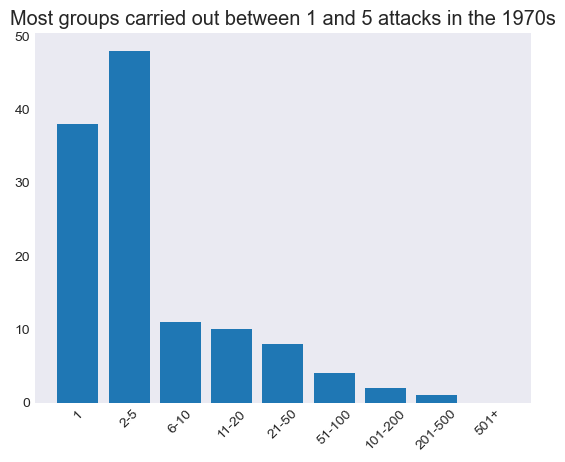

In [389]:
plt.bar(num_attack_counts_1970s['num_attack'],num_attack_counts_1970s['count'], color='tab:blue')

plt.xticks(rotation=45)

plt.title("Most groups carried out between 1 and 5 attacks in the 1970s")

plt.show()

In [367]:
attack_perp_counts_2010s=pd.DataFrame(attacks_2010s['gname'].value_counts())
attack_perp_counts_2010s = attack_perp_counts_2010s.reset_index()
attack_perp_counts_2010s.sort_values(by='count', ascending=False, inplace= True)

attack_perp_counts_2010s.head(50)

,gname,count
0,Unknown,164
1,White supremacists/nationalists,49
2,Anti-Muslim extremists,45
3,Jihadi-inspired extremists,36
4,Anti-Government extremists,24
5,Anti-Semitic extremists,20
6,Pro-Trump extremists,17
7,Anti-Police extremists,17
8,Conspiracy theory extremists,16
9,Anti-Abortion extremists,15


In [368]:
total_attacks_2010s = attack_perp_counts_2010s['count'].sum()
total_groups_2010s = len(attack_perp_counts_2010s['gname'])
avg_num_attacks = round(total_attacks/total_groups,1)

print(f'The average group carried out {avg_num_attacks} attacks in the 2010s')

The average group carried out 12.1 attacks in the 2010s


In [369]:
bins=[0,1,5,10,20,50,100,200,500,700]

attack_perp_counts_2010s['bins'] = pd.cut(attack_perp_counts_2010s['count'],bins)

In [370]:
num_attack_counts_2010s=pd.DataFrame(attack_perp_counts_2010s['bins'].value_counts())
num_attack_counts_2010s = num_attack_counts_2010s.reset_index()
num_attack_counts_2010s.sort_values(by='bins', ascending=True, inplace= True)

num_attack_counts_2010s.head(50)

,bins,count
1,"(0, 1]",14
0,"(1, 5]",22
3,"(5, 10]",4
2,"(10, 20]",6
4,"(20, 50]",4
6,"(50, 100]",0
5,"(100, 200]",1
7,"(200, 500]",0
8,"(500, 700]",0


In [371]:
num_attacks = ['1','2-5','6-10','11-20','21-50','51-100','101-200','201-500','501+']

num_attack_counts_2010s['num_attack'] = num_attacks

num_attack_counts_2010s.head()

,bins,count,num_attack
1,"(0, 1]",14,1
0,"(1, 5]",22,2-5
3,"(5, 10]",4,6-10
2,"(10, 20]",6,11-20
4,"(20, 50]",4,21-50


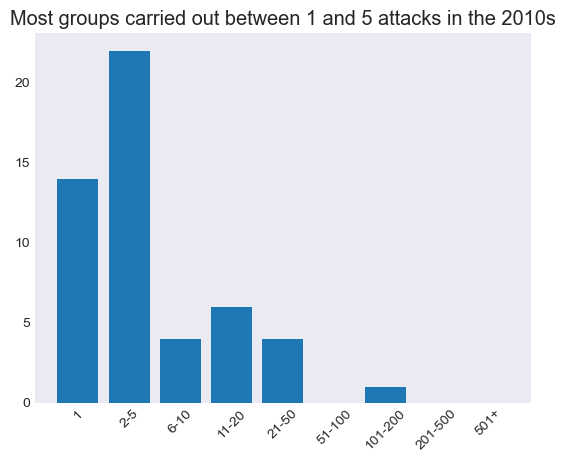

In [390]:
plt.bar(num_attack_counts_2010s['num_attack'],num_attack_counts_2010s['count'], color = 'tab:blue')

plt.xticks(rotation=45)

plt.title("Most groups carried out between 1 and 5 attacks in the 2010s")

plt.show()

### <a id='toc5_1_7_'></a>[Differences between active groups 70’s vs. 2010s](#toc0_)

In [391]:
groups_in_common

{'Anti-Abortion extremists',
 'Anti-Government extremists',
 'Ku Klux Klan',
 'Left-wing extremists',
 'Neo-Nazi extremists',
 'Right-wing extremists',
 'Unknown',
 'White supremacists/nationalists'}

These are all pretty common groups and/or political persuasions. Nothing suprising here.

In [392]:
groups_limited_to_70s


['ROSADO-SOTO Command',
 'Strikers',
 'Anti-Castro Command',
 'Black Afro Militant Movement',
 'Left-Wing Militants',
 'Hawaiian extremists',
 'Black Liberation Army',
 'Jonathan Jackson Brigade',
 'BAY Bombers',
 'Cuban Action',
 "People's Revolutionary Party",
 'Youth of the Star',
 "People's Liberation Army (United States)",
 'M-7',
 'Armed Forces of Popular Resistance (FARP)',
 'Symbionese Liberation Army (SLA)',
 'Omega-7',
 'New Jewish Defense League',
 'The World United Formosans for Independence (WUFI)',
 'Cuban C-4 Movement',
 'Puerto Rican Nationalists',
 'Hanafi Muslims',
 'Latin America Anti-Communist Army (LAACA)',
 'Puerto Rican Revolutionary Movement',
 'Arabs',
 'Macheteros',
 'Armenian Group',
 'Weather Underground, Weathermen',
 'National Socialist Liberation Front',
 'Secret Cuban Government',
 'National Integration Front (FIN)',
 'American Indian Movement',
 'Revolutionary Force 26',
 'Armed Commandos of Liberation',
 'Americans for Justice',
 'Irish Republican Army

In [419]:
anti_tech = usa_df[usa_df['gname']=='Anti-Technology extremists']

print(anti_tech['summary'].iloc[10])


nan


In [421]:
revolutionary_force_9 = usa_df[usa_df['gname']=='Revolutionary Force 9']

print(revolutionary_force_9['summary'].iloc[2])

3/12/1970: In a series of related attacks, the Revolutionary Force 9 claimed credit for the bombing of the Mobil Oil Company Building in Manhattan, New York, United States. There were no casualties but the building sustained heavy structural damage. The Revolutionary Force 9 claimed that the Mobil Oil Company was an "enem(y) of human life" because it profited off of the Vietnam War.


In [422]:
zebra_killers = usa_df[usa_df['gname']=='Zebra killers']

print(zebra_killers['summary'].iloc[2])

10/29/1973: An assailant shot and killed Frances Rose, a white female student, in San Francisco, California, United States. Rose was driving up to the entrance of the University of California at Berkeley extension center, when she was approached by Jesse Cooks, who walked in front of her car and asked for a ride. Rose attempted to leave when Cooks shoot her three times with a .22 caliber gun. Cooks confessed to the murder and was sentenced to prison. This was the second in a series of 20 racially motivated attacks (with 23 victims) targeting white people by black Muslims who came to be known as the Zebra Killers.


Alot of the above groups are hard to find info on. Generally speaking, the groups seem to fall into a few categories:

- Black Nationalist/ Power
- Communist Groups
- Cuban independence/ Anti-Castro
- Puerto Rican independence
- Nationalist/ Liberation Movements (Croatia, )
- Anti-War Groups
- Environmental Groups

In [393]:
groups_limited_to_2010s

['Anti-Arab extremists',
 'Anti-Muslim extremists',
 'Pro-LGBT Rights extremists',
 'Court Reform extremists',
 'Animal Liberation Front (ALF)',
 'Conspiracy theory extremists',
 'Anarchists',
 'White Rabbit Three Percent Illinois Patriot Freedom Fighters Militia',
 'Boogaloo movement',
 'Students For Insurrection',
 'Anti-globalization extremists',
 'Anti-Trump extremists',
 'Sovereign Citizen',
 'Anti-Religion extremists',
 'Black Hebrew Israelites',
 'Shield Wall Network (SWN)',
 'United Constitutional Patriots',
 'Anti-LGBT extremists',
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Environmentalists',
 'Animal Rights extremists',
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Anti-Immigrant extremists',
 'Citizens for Constitutional Freedom',
 'Male supremacists',
 'Iraqi extremists',
 'Shooters of the Nest',
 'Pro-choice extremists',
 'Anti-Gun Control extremists',
 'Anti-Fascist Activists',
 'Muslim extremists',
 'Veterans United for Non-Religious Memorials',
 'Anti-Republican extremists

It's a different mix here than in the 70's. It seems like this reflects the different political issues and
concerns in the 2010s vs. the 1970s.

- Nativist and White Nationalist Groups
- Militia groups
- Islamist Groups
- Pro and Anti LGBT
- Various pro and anti-religion groups
- Conspiracy Theory and Trump Related Extremists

In [395]:
conspiracy = usa_df[usa_df['gname']=='Conspiracy theory extremists']
conspiracy['summary'].iloc[9]

'03/31/2020: An assailant derailed a locomotive in an attempt to have it crash into the United States Navy Hospital Ship Mercy at the Port of Los Angeles in Los Angeles, California, United States. There were no reported casualties in the attack. Eduardo Moreno, a train engineer, confessed to intentionally derailing the train in an attempt to "wake people up" about the presence of the hospital ship. He was suspicious that the ship may have been docked to spread COVID-19 or to facilitate a government takeover.'

In [403]:
trump = usa_df[usa_df['gname']=='Pro-Trump extremists']
print(trump['summary'].iloc[3])
print(trump['summary'].iloc[5])
print(trump['summary'].iloc[14])

10/24/2018: A letter bomb addressed to former Central Intelligence Agency director, John Brennan, was discovered and defused at the CNN mail room located in the Time Warner Center at Columbus Circle in Manhattan, New York City, United States. This was one of 16 coordinated mail bomb attacks between October 22, 2018 and November 1, 2018 that targeted critics of President Donald Trump. Cesar Altieri Sayoc was arrested in connection with the incidents. Sources noted that Sayoc's vehicle was covered in right-wing paraphernalia.
10/24/2018: A letter bomb addressed to Democratic Representative Maxine Waters was discovered and defused at a mail sorting facility in Los Angeles, California, United States. This was one of 16 coordinated mail bomb attacks and one of two letter bombs addressed to Waters between October 22, 2018 and November 1, 2018 that targeted critics of President Donald Trump. Cesar Altieri Sayoc was arrested in connection with the incidents. Sources noted that Sayoc's vehicle 

# <a id='toc6_'></a>[Summary](#toc0_)

Terroist activity in the United States from 1970 to 2020 shows a significant spike in the 1970's.
This is followed by lower levels of activtiy in the 80s,90s and 2000s, with occasional large one off attacks such as the 
Oklahoma city Bombing and 9/11. 

Between 2010 and 2020 the data shows an approximately 5x increase in terroist attacks in the US. This increase 
means that the last year in the data set (2020) is comparable to the mid-1970s in terms of number of attacks. 

A comparison between the attacks of the 1970s and the 2010s shows a marked difference in the groups responsible, the weapons used, and the targets attacked. 

Qualitativly it appears that the pattern of attacks, groups and targets largely reflects the politics of the time. There are a few long standing terrorist organizations,
but generally speaking most groups carry out only a few attacks and are active for only a short time. 

In addition, many attacks are done by unknown perpetrators who attack less than 5 times. This makes it difficult to see how to prevent attacks.

Despite what's seen on the news, most attacks are small and causes no wounds or deaths. It's not always clear if this is due to incompetence
or by design. 

More research is needed into what causes people to carry out these attacks, and into what steps might be effective to prevent them in the future. 

The data available for this analysis ends in 2020. This is due to a lag in collecting and processing information on attacks. It remains to be seen if 
the upward trend identified here will continue past 2020. If, as is appears, terrorist activity is less a matter of sustained groups and more a matter of small acts done by 
obscure and radicalized persons, we should expect the trend upward to continue.